In [1]:
import numpy as np
from scipy.io import loadmat

In [2]:
def load_normalized_mat(mat_path):
    
    mat = loadmat(mat_path)
    gaze_vec = mat['data'][0][0][0][0][0][0]
    eye_img = mat['data'][0][0][0][0][0][1]
    
    return eye_img, gaze_vec

In [3]:
mat_path_train = '../data/MPIIGaze/Data/Normalized/p00/day01.mat'
mat_path_val = '../data/MPIIGaze/Data/Normalized/p00/day02.mat'

eye_img_tr, gaze_vec_tr = load_normalized_mat(mat_path_train)
eye_img_val, gaze_vec_val = load_normalized_mat(mat_path_val)

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


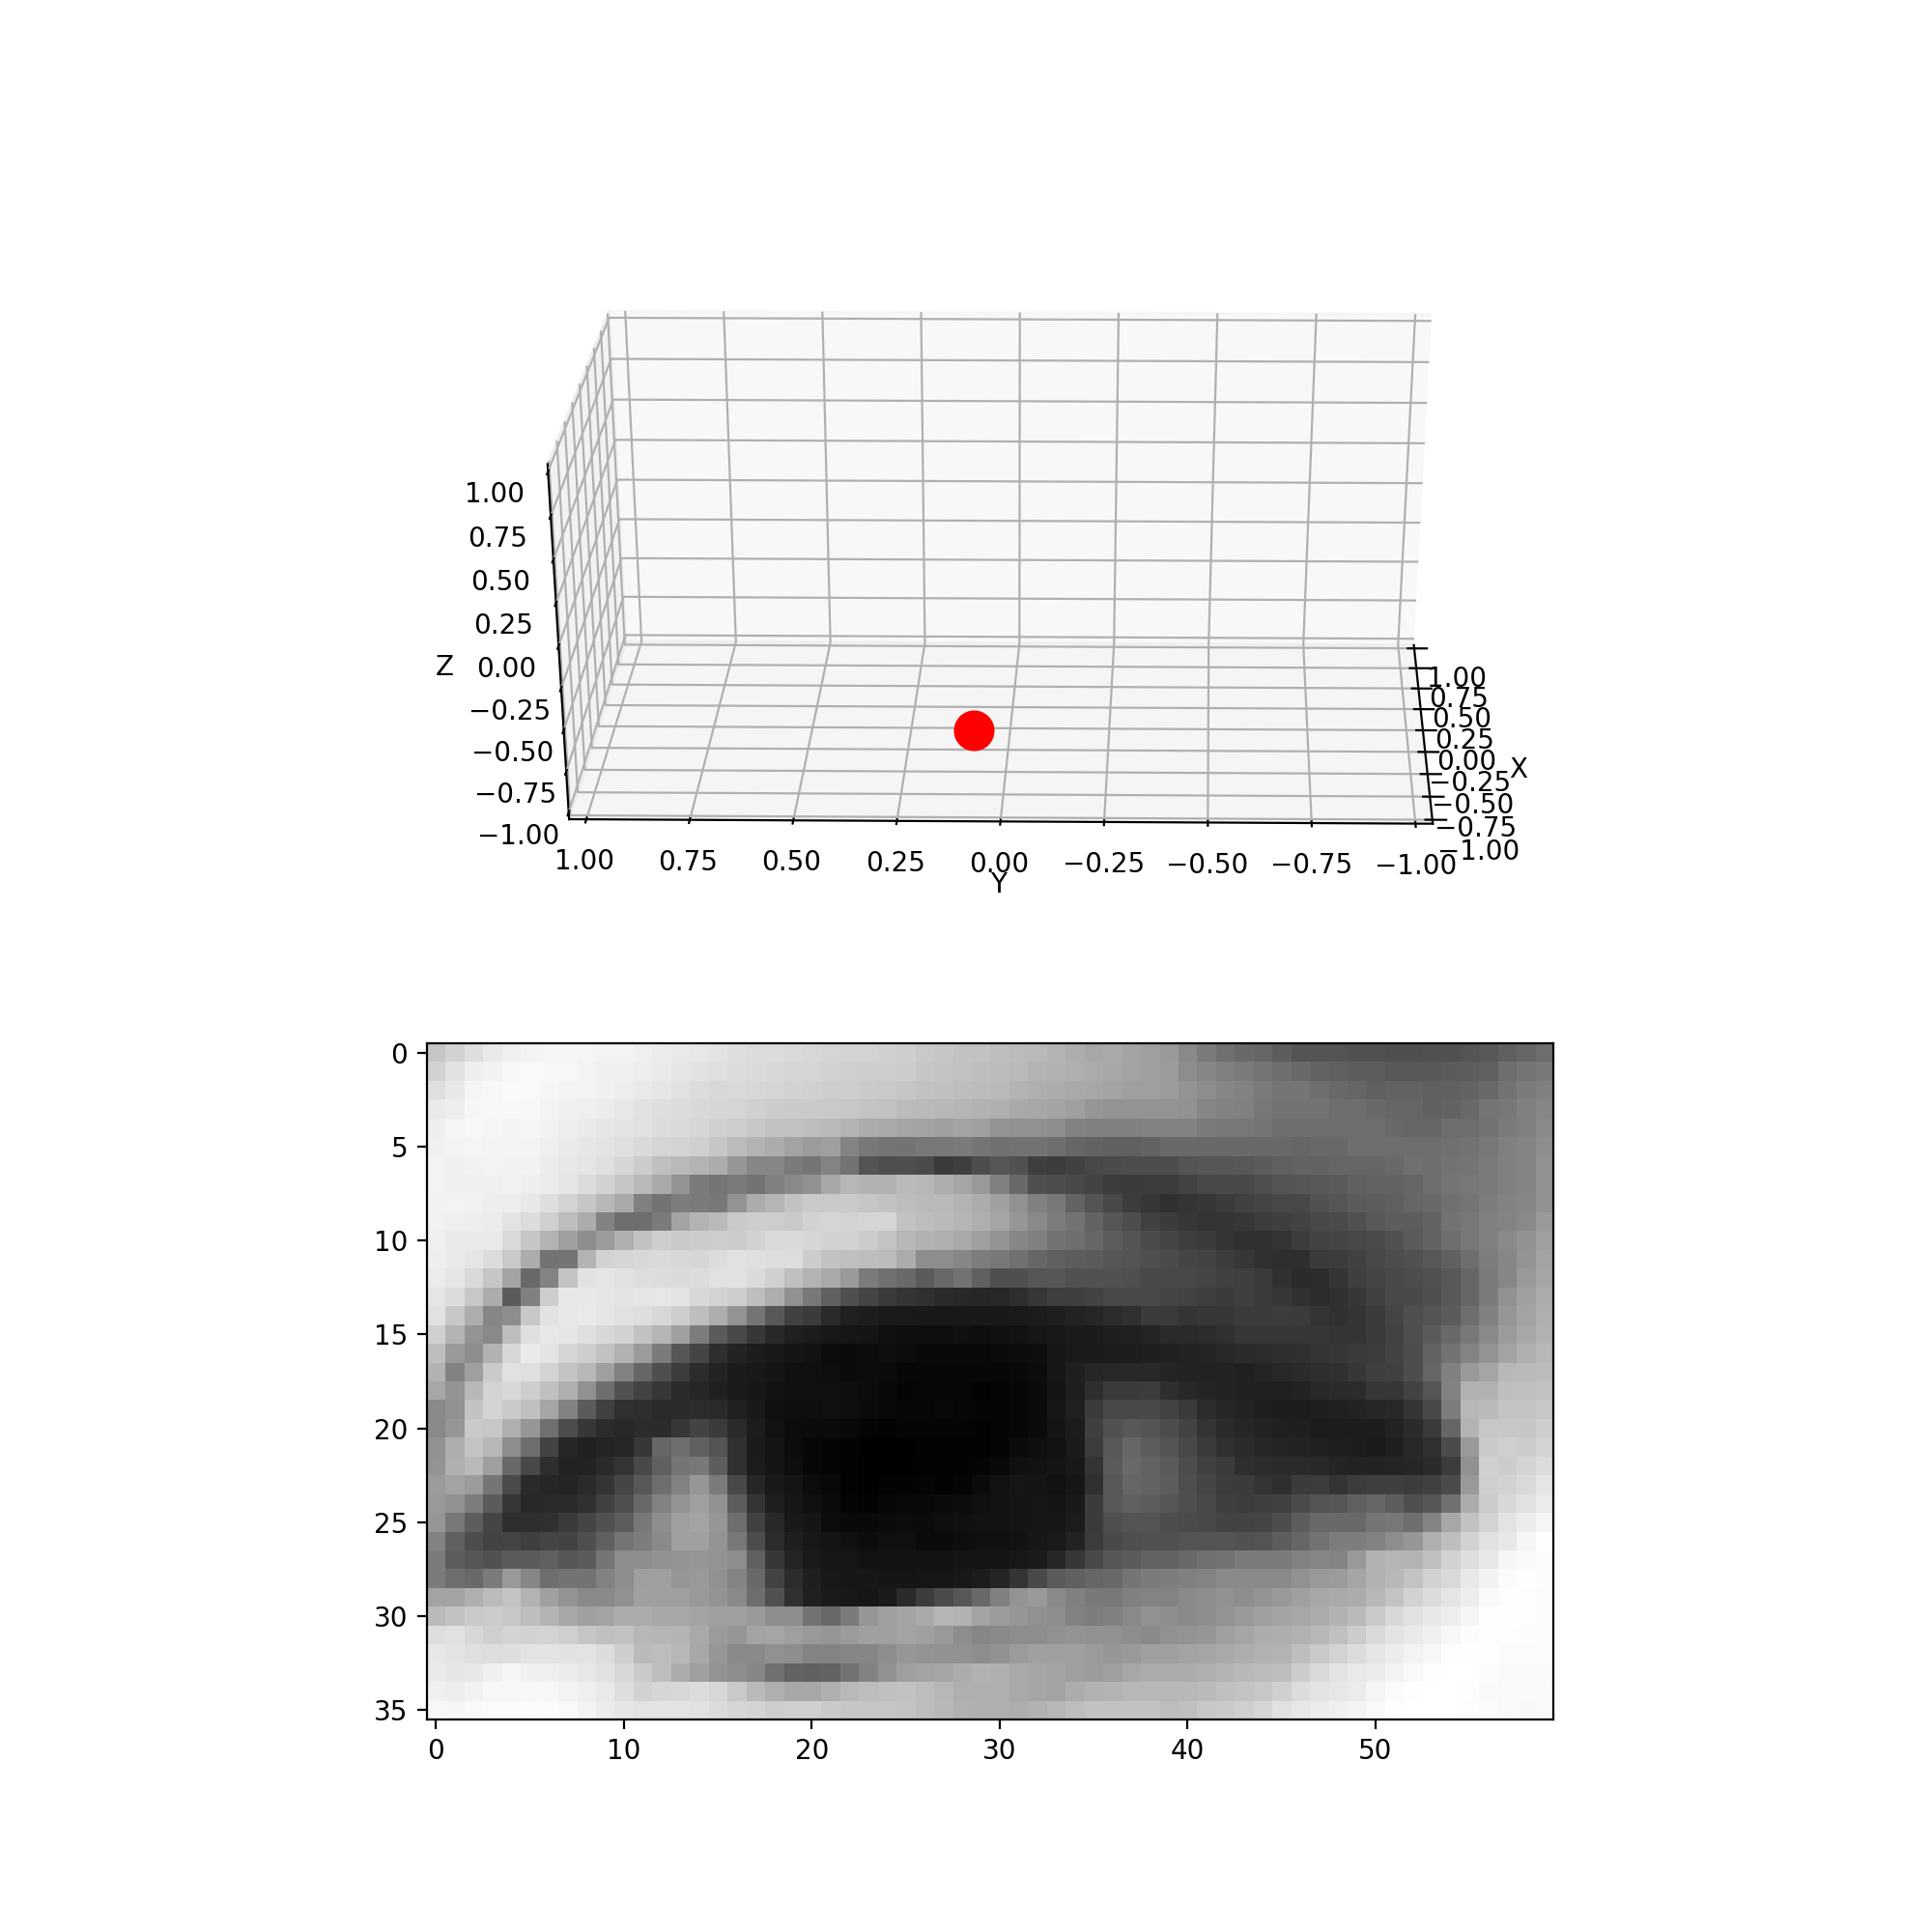

In [8]:
gid = 0

zero = np.zeros([1, 3])
gaze = gaze_vec_tr[gid, :].reshape([1, 3])

gaze_dir = gaze #np.vstack([zero, gaze])

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(211, projection='3d')

ax.scatter(gaze_dir[:,0] , gaze_dir[:, 1], gaze_dir[:, 2], color='red', s=200)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax2 = fig.add_subplot(212)

ax2.imshow(eye_img_tr[gid], cmap='gray')

fig.show()

In [9]:
gaze_dir

array([[-0.12202543,  0.09011014, -0.98842802]])

In [10]:
from utils.angles import rad2bit, bit2deg

phi_gt = np.arctan(gaze_vec_tr[:, 1] / gaze_vec_tr[:, 0])
theta_gt = np.arccos(gaze_vec_tr[:, 2])

phi_gt_bit = rad2bit(phi_gt)
theta_gt_bit = rad2bit(theta_gt)

In [11]:
def show_gaze_dir(gaze_vec, ax=None):

    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
    
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    mesh_size = 50j
    phi, theta = np.mgrid[0:2*pi:mesh_size, 0:pi:mesh_size]
    
    x = r * sin(theta) * cos(phi)
    y = r * sin(theta) * sin(phi)
    z = r * cos(theta)
    
    ax.plot_surface(x, y, z,  rstride=1, cstride=1)

    ax.scatter(gaze_vec[:,0] , gaze_vec[:, 1], gaze_vec[:, 2], s=200, color='red', zorder=1)
    
    return ax

def show_eye_gaze(eye_img, gaze_vec, axes=None):
    
    if axes is None:
        fig, axes = plt.subplots(2, figsize=(10, 10))
    
    axes[0].imshow(eye_img)
        
    return fig

In [19]:
import math as m

def cart_to_spherical(xyz):
    r_phi_theta = np.zeros(xyz.shape)
    xy = xyz[:,0]**2 + xyz[:,1]**2
    r_phi_theta[:,0] = np.sqrt(xy + xyz[:,2]**2)
    r_phi_theta[:,1] = np.arctan2( xyz[:,1], xyz[:,0]) # for elevation angle defined from XY-plane up
    r_phi_theta[:,2] = np.arccos(xyz[:, 2]) #theta = arccos(z/r)
    return r_phi_theta

def get_mesh_pos(target_phi, target_theta, phi_mesh, theta_mesh):
    phi_pos = np.where(phi_mesh[:, 0]<=target_phi)[0][-1]
    theta_pos = np.where(theta_mesh[0, :]<=target_theta)[0][-1]
    return phi_pos, theta_pos

<IPython.core.display.Javascript object>


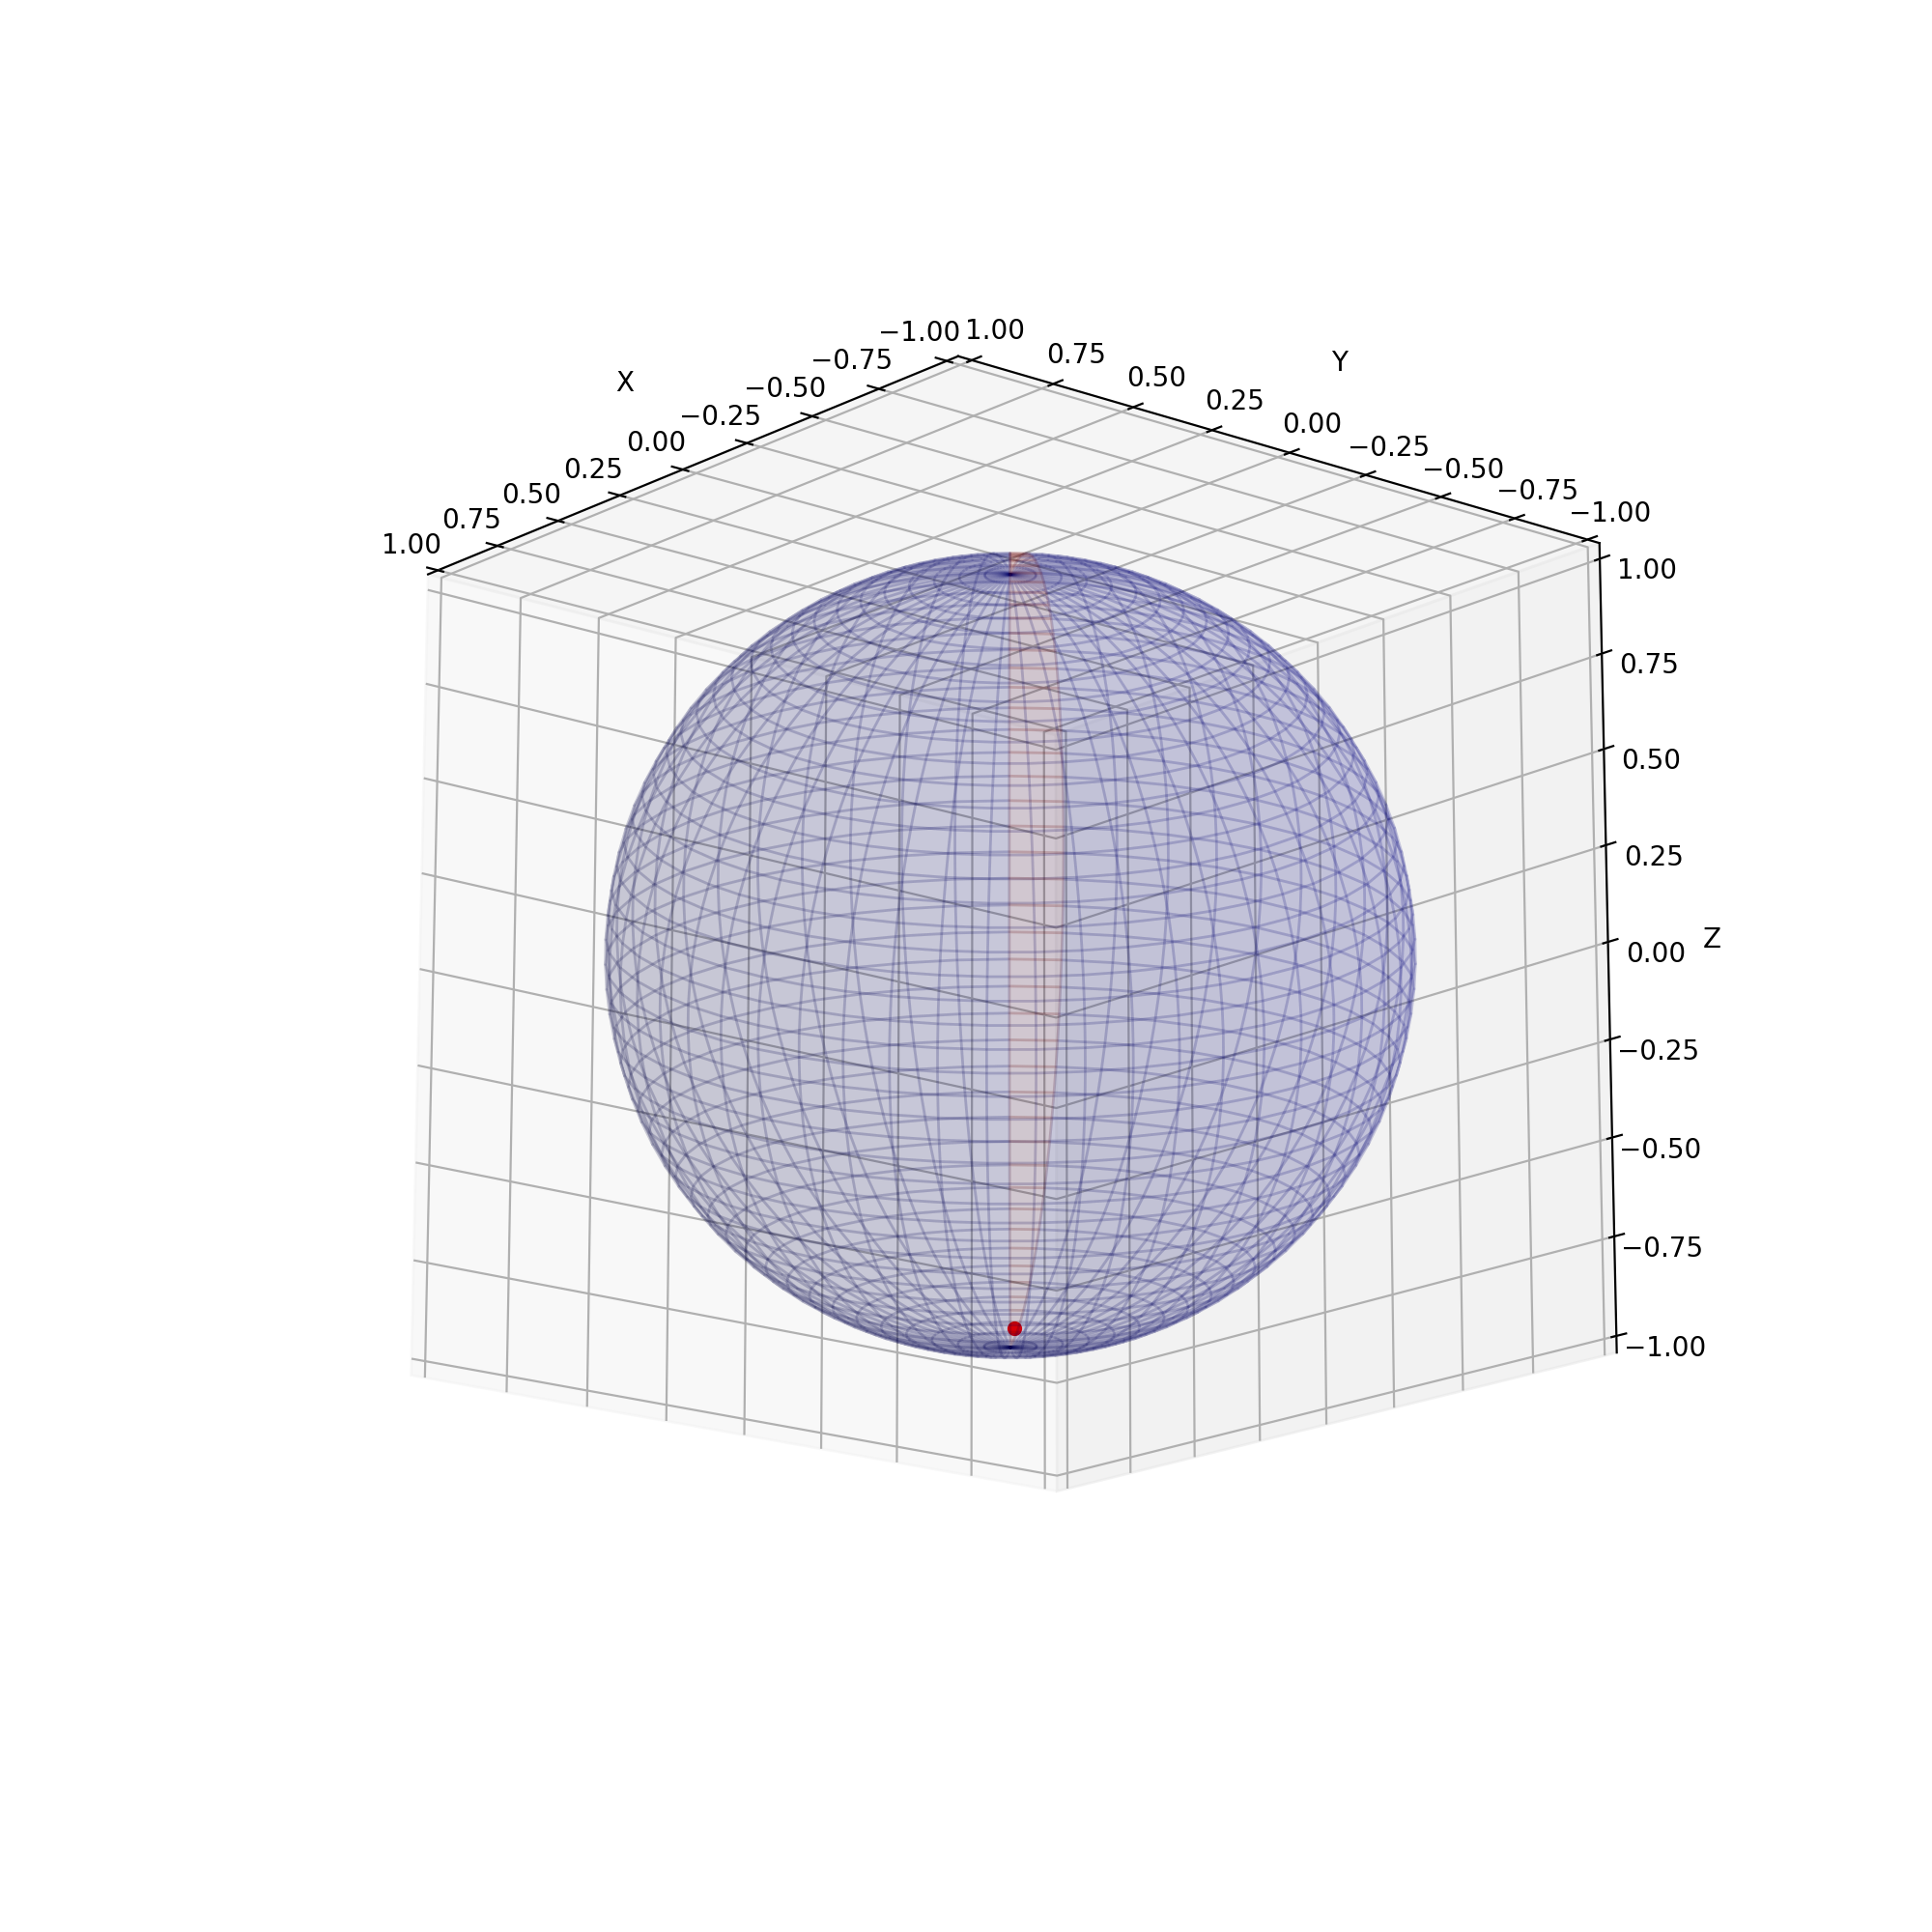

In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import special
from scipy.stats import vonmises, norm

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
mesh_size = 50j
phi_mesh, theta_mesh = np.mgrid[0:2*pi:mesh_size, 0:pi:mesh_size]

x = r * sin(theta_mesh) * cos(phi_mesh)
y = r * sin(theta_mesh) * sin(phi_mesh)
z = r * cos(theta_mesh)
hmap = np.zeros(x.shape)

r_phi_theta = cart_to_spherical(gaze)
target_phi = r_phi_theta[:, 1] 
target_theta = r_phi_theta[:, 2] 

phi_pos, theta_pos = get_mesh_pos(target_phi, target_theta, phi_mesh, theta_mesh)

hmap[phi_pos, :] = 1
#hmap[phi_pos, :] = 1
#hmap[39, 20] = 1

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

#ax.scatter(1.1 , 0, 0, s=200, color='red', zorder=0)

norm=colors.Normalize(vmin = np.min(hmap), vmax = np.max(hmap), clip = False)

ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.jet(norm(hmap)), alpha=0.1)
ax.scatter(gaze[:,0] , gaze[:, 1], gaze[:, 2], color='red', s=20)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [304]:
cart_to_spherical(gaze)

array([[ 1.       ,  2.9893142,  2.9893142]])

In [309]:
np.linalg.norm(gaze)

1.0

In [306]:
gaze

array([[-0.12202543,  0.09011014, -0.98842802]])

In [250]:
target_theta

array([ 2.50552216])

In [307]:
np.arccos(gaze[:, 2])

array([ 2.9893142])

In [266]:
cart_to_spherical(gaze)

array([[ 1.78246429,  2.9893142 ,  1.48056379]])

In [168]:
get_mesh_pos(0, 3.15, phi_mesh, theta_mesh)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [159]:
target_phi = pi
target_theta = pi


In [107]:
np.where(phi_mesh <= target_phi)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

In [77]:
phi_mesh, theta_mesh = np.mgrid[0:2*pi:mesh_size, 0:pi:mesh_size]

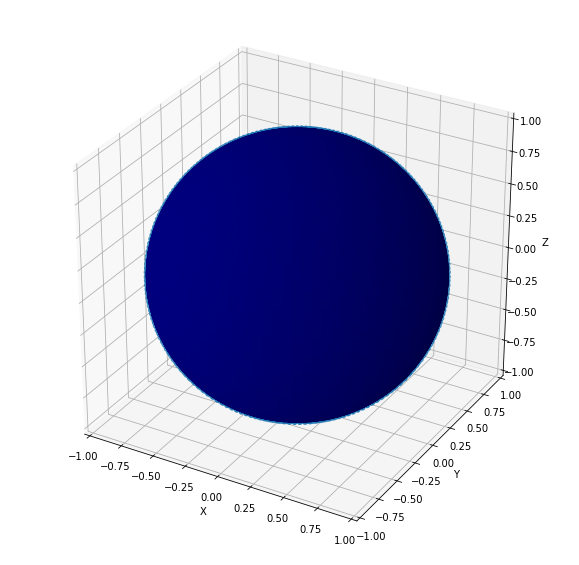

In [87]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import special
from scipy.stats import vonmises, norm

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
mesh_size = 100j
phi, theta = np.mgrid[0:2*pi:mesh_size, 0:pi:mesh_size/2]

x = r * sin(theta) * cos(phi)
y = r * sin(theta) * sin(phi)
z = r * cos(theta)

phi_vals = np.mgrid[0:2*pi:mesh_size]
theta_vals = np.mgrid[0:pi:mesh_size/2]

_, theta_gt, phi_gt = cart2sph(gaze_vec_tr[0,0], gaze_vec_tr[0,1], gaze_vec_tr[0,2])
phi_pdf = vonmises.pdf(phi_vals, loc=pi, kappa=1.0).reshape([1, -1])
theta_pdf = vonmises.pdf(theta_vals, loc=pi/4, kappa=1.0).reshape([1, -1])

#norm = colors.Normalize()

colorfunction = np.zeros([100, 50]) #phi_pdf.T.dot(theta_pdf)

norm=colors.Normalize(vmin = np.min(colorfunction), vmax = np.max(colorfunction), clip = False)

#print(colorfunction)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z)
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.jet(norm(colorfunction)))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [88]:
colorfunction.shape

(100, 50)

In [78]:
z.shape

(50, 25)

In [72]:
sin(theta_gt) * cos(phi_gt)

0.090110139961111793

In [73]:
sin(theta_gt) * sin(phi_gt)

-0.58716479455445592

In [55]:
theta_gt[0]

2.9893141987385534

In [74]:
gaze_vec_tr[0]

array([-0.12202543,  0.09011014, -0.98842802])

In [51]:
colorfunction.shape

(50, 25)

In [36]:
vggbit_cosine_model.model.predict(gaze_img[0:10])

array([[ 0.74975163, -0.66171938],
       [ 0.54238766, -0.8401283 ],
       [ 0.6194604 , -0.78502774],
       [ 0.59362859,  0.80473906],
       [ 0.30595237,  0.95204675],
       [ 0.54878092, -0.83596617],
       [ 0.7903946 , -0.61259806],
       [ 0.41240904,  0.91099882],
       [ 0.74981004, -0.6616531 ],
       [ 0.80102843, -0.59862632]], dtype=float32)

In [9]:
from models import vgg

image_height, image_width  = gaze_img.shape[1:3]

vggbit_cosine_model = vgg.BiternionVGG(image_height=image_height,
                                image_width=image_width,
                                n_channels=1,
                                predict_kappa=False,
                                loss_type='cosine')

gaze_img = np.expand_dims(gaze_img, axis=-1)

vggbit_cosine_model.fit(train_data=[gaze_img, phi_gt_bit], val_data=[gaze_img, phi_gt_bit], n_epochs=10, batch_size=32)

Using TensorFlow backend.
